<a href="https://colab.research.google.com/github/OmniaOsama03/Artificial_Intelligence_Programming_Labs/blob/main/Lab%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI LAB - 4
#Name - Omnia Osama Ahmed


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


#Loading the Dataset

In [ ]:
data = pd.read_csv('heart_disease.csv')
X = data[['age', 'blood pressure']].values

#Task 1 - K-Means Algorithm


In [ ]:
kmeans = (KMeans(n_clusters = 4,init='k-means++', n_init = 10 ,max_iter=400,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )

kmeans.fit(X)
y_means = kmeans.predict(X)

##Visualization

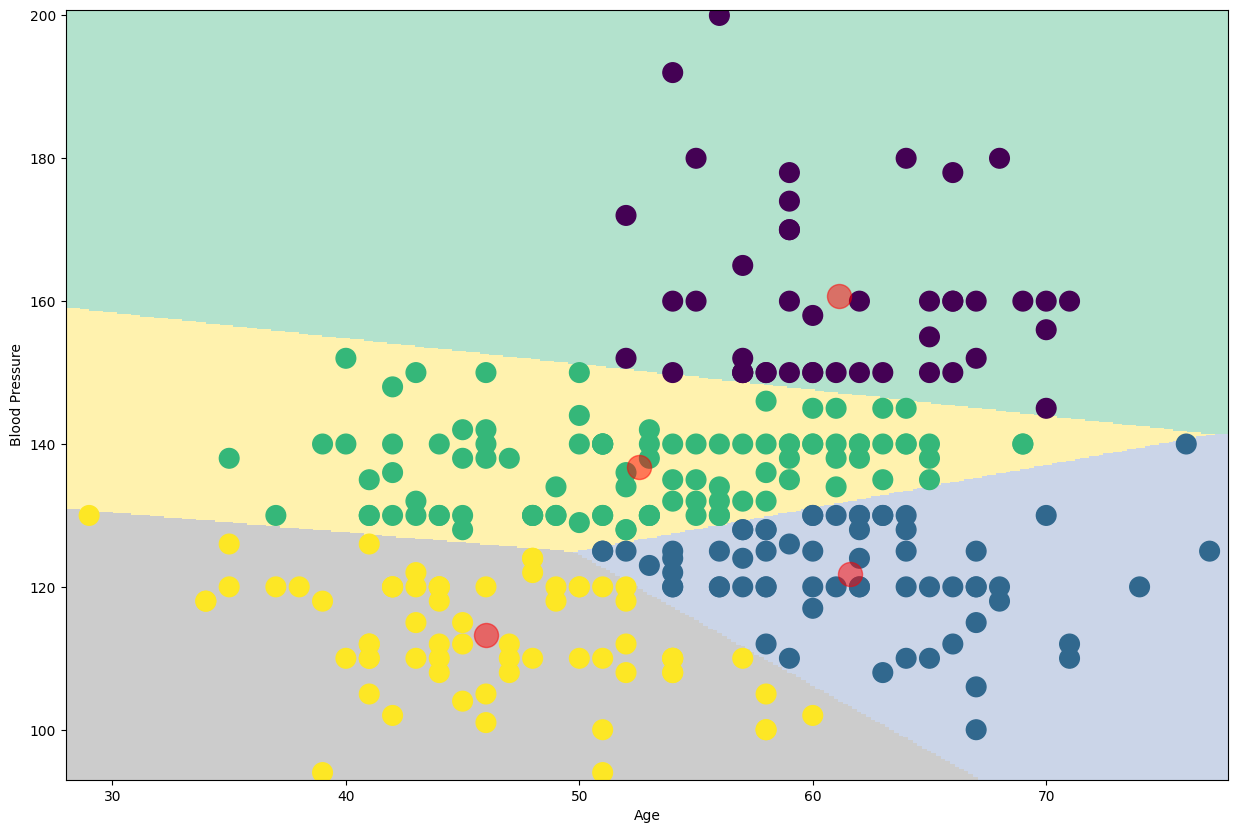

In [ ]:
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 10))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='age', y='blood pressure', data=data, c=labels1, s=200, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Blood Pressure')

plt.show()

##Score Calculation

In [ ]:
#Calculate SSE
sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)
print("")


# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_means)
print("Silhouette Score:", silhouette_avg)

Sum of squared errors (SSE): 29304.598817331098

Silhouette Score: 0.34817207040162773


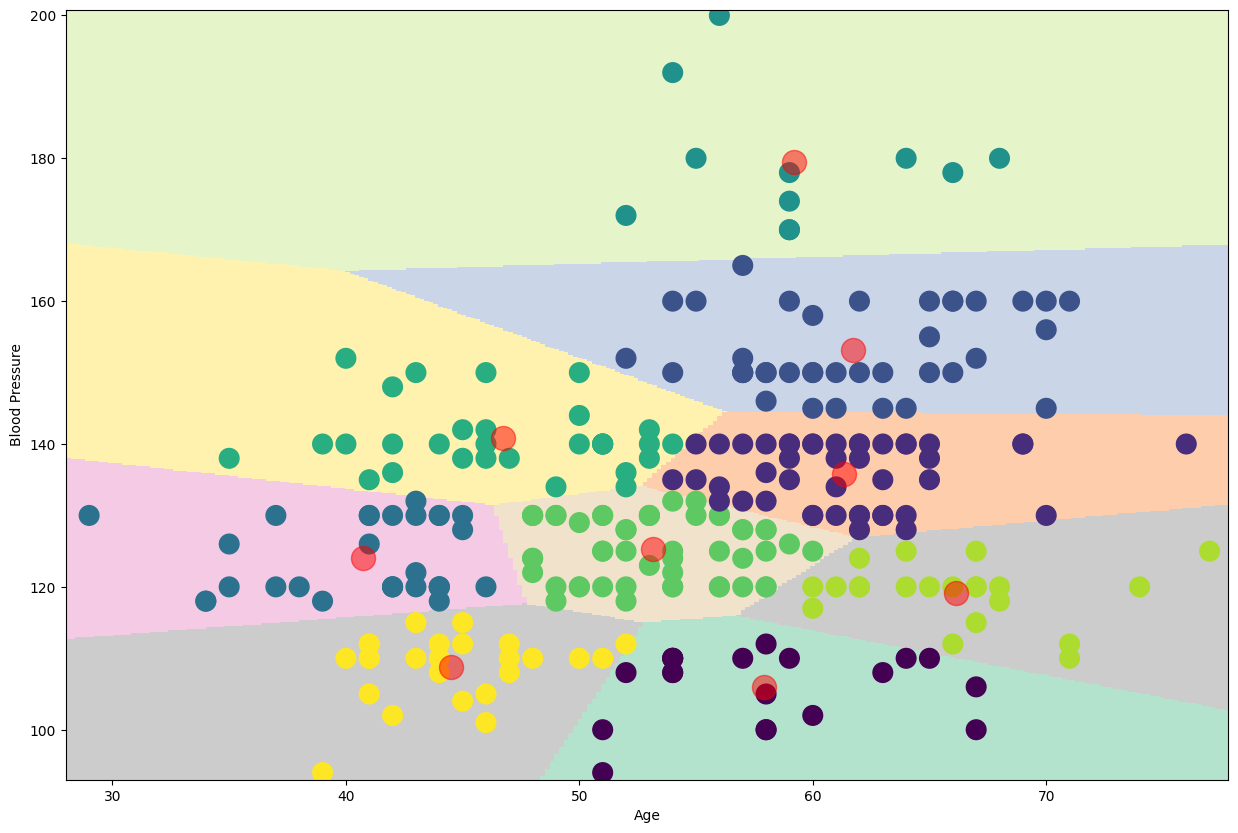

Sum of squared errors (SSE): 11556.345293458406

Silhouette Score: 0.37809926459978394


In [ ]:
#RUN 2:
kmeans = (KMeans(n_clusters = 9,init='k-means++', n_init = 10 ,max_iter=400,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )

kmeans.fit(X)
y_means = kmeans.predict(X)

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 10))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='age', y='blood pressure', data=data, c=labels1, s=200, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Blood Pressure')

plt.show()


#Calculate SSE
sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)
print("")


# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_means)
print("Silhouette Score:", silhouette_avg)


#Task 2 - Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.3, min_samples= 6)  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_


##Visualization

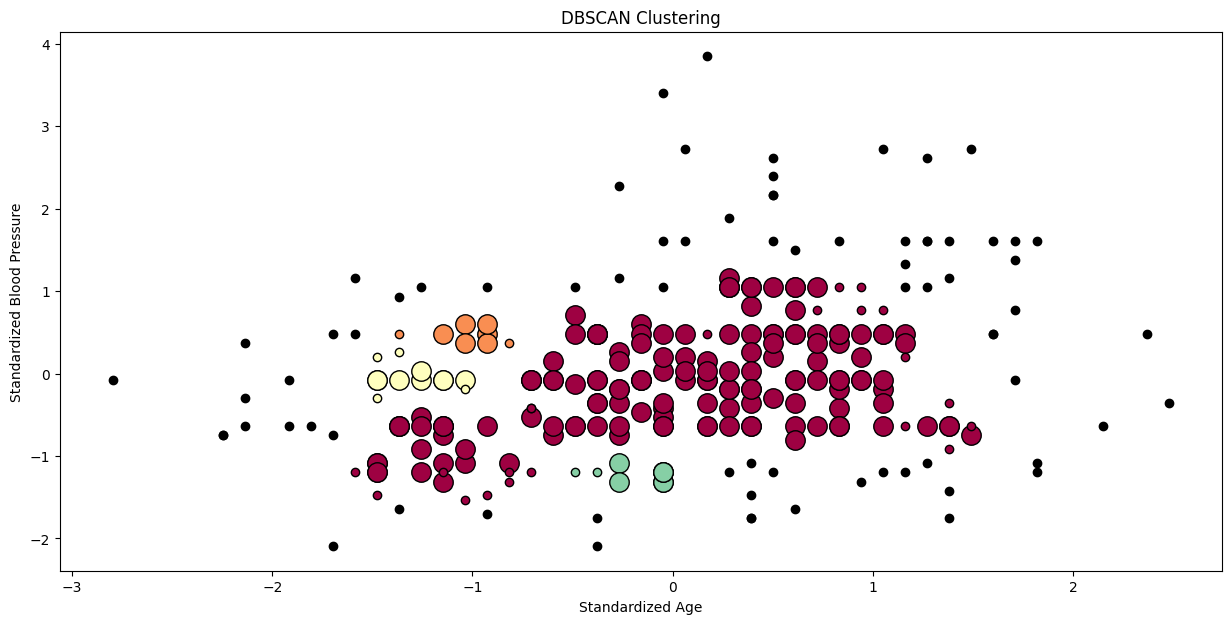

In [ ]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Blood Pressure')
plt.show()

##Score Calculation

In [ ]:
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.08028260561571639


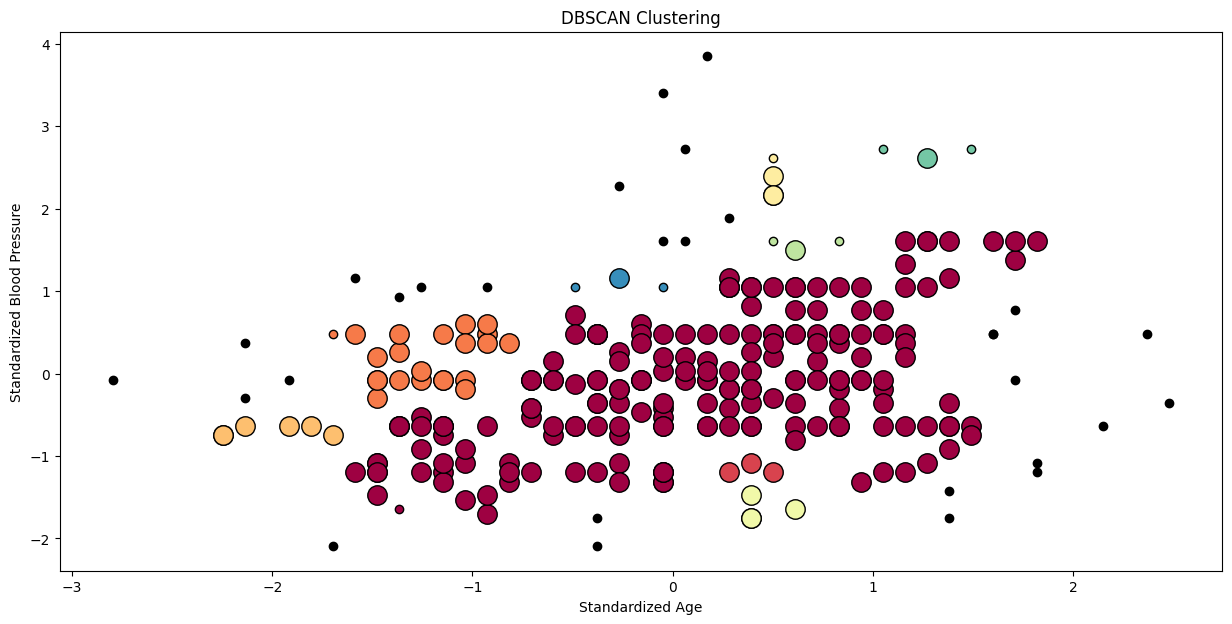

Silhouette Score: -0.19773583904873557


In [ ]:
#RUN 2

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.29, min_samples= 3)  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Blood Pressure')
plt.show()


silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

#Task 3 - Hierarchical Clustering

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
agg_clust = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward')
labels = agg_clust.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##Visualization

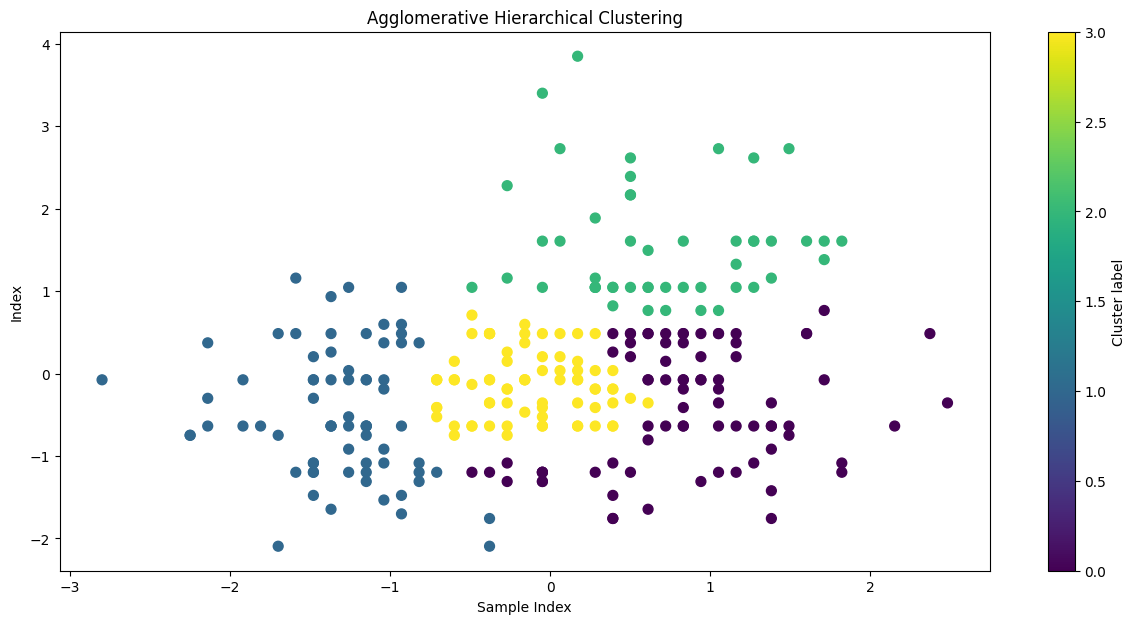

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Index')
plt.colorbar(label='Cluster label')
plt.show()


##Score Calculation


In [ ]:
silhouette_avg = silhouette_score( X_scaled, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.2873418486604833


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


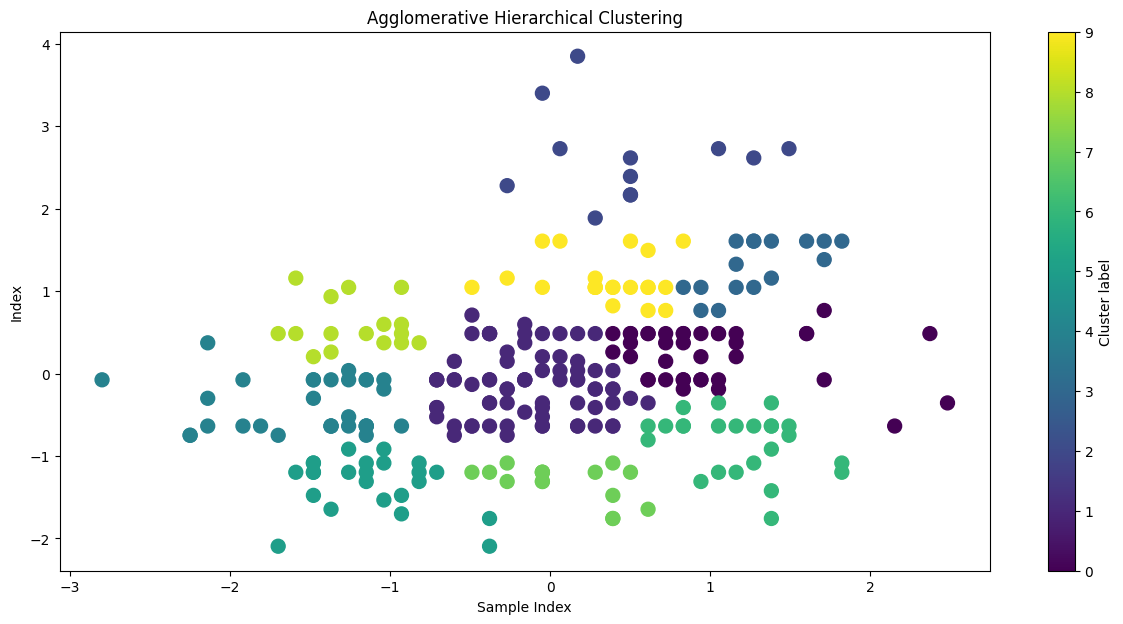

Silhouette Score: 0.3279512159571101


In [ ]:
#RUN 2:
X_scaled = StandardScaler().fit_transform(X)
agg_clust = AgglomerativeClustering(n_clusters= 10, affinity='euclidean', linkage='ward')
labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=100)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Index')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score( X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

#Task 4 - Choose best algorithm

Comparing the results:

***1. k-means:***

**RUN 1: 4 Clusters**
Sum of squared errors (SSE): 29304.598817331098

Silhouette Score: 0.34817207040162773

**RUN 2: 9 Clusters**
Sum of squared errors (SSE): 11556.345293458406

Silhouette Score: 0.37809926459978394


***2. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)***

**RUN 1: eps= 0.3, min_samples= 6**

Silhouette Score: -0.08028260561571639

**RUN 2: eps= 0.29, min_samples= 3**

Silhouette Score: 0.19773583904873557


***3. Hierarchical Clustering***

**RUN 1: 4 Clusters**

Silhouette Score:  0.2873418486604833

**RUN 2: 9 Clusters**

Silhouette Score: 0.3279512159571101


***RESULT***
After multiple runs and trials, it appears that k-means fits best for this dataset since it has the highest Silhouette Score. This means that it has better cohesion of points within the clusters and separation of clusters.